In [1]:
# Library imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import random as rnd

In [2]:
# Read CSV

df = pd.read_csv('Advertising.csv');
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# Add two columns TVstd and TVnorm to Advertising dataframe

df = df.assign(TVstd=lambda x: (x['TV'] - x['TV'].mean()) / x['TV'].std(),
               TVnorm=lambda x: (x['TV'] - x['TV'].min()) / (x['TV'].max() - x['TV'].min()))
df

,Unnamed: 0,TV,radio,newspaper,sales,TVstd,TVnorm
0,1,230.1,37.8,69.2,22.1,0.967425,0.775786
1,2,44.5,39.3,45.1,10.4,-1.194379,0.148123
2,3,17.2,45.9,69.3,9.3,-1.512360,0.055800
3,4,151.5,41.3,58.5,18.5,0.051919,0.509976
4,5,180.8,10.8,58.4,12.9,0.393196,0.609063
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,-1.267759,0.126818
196,197,94.2,4.9,8.1,9.7,-0.615491,0.316199
197,198,177.0,9.3,6.4,12.8,0.348934,0.596212
198,199,283.6,42.0,66.2,25.5,1.590574,0.956713


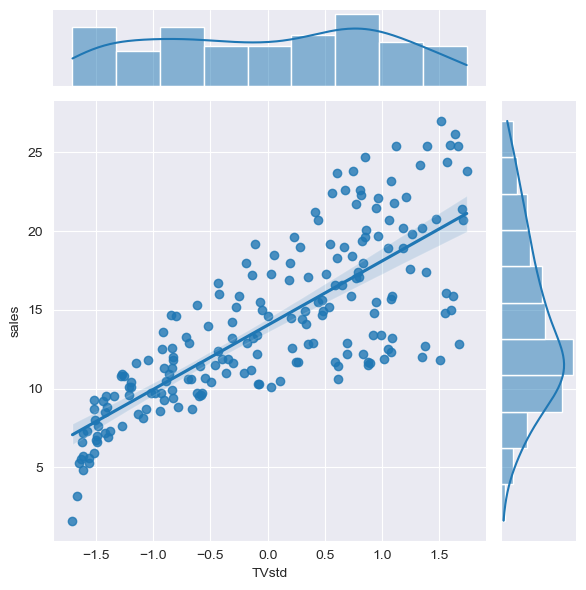

In [4]:
# Create a joint plot of sales vs TVstd using Seaborn.

sns.jointplot(x=df['TVstd'], y=df['sales'], kind='reg')

In [5]:
# Implement functions for MSE (Mean Squared Error) and MAE (Mean Absolute Error)

def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse


def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae


def findZ(a0, a1, arr, func):
    out = []
    for e0 in a0:
        mse = []
        for e1 in a1:
            pred = []

            for x in arr:
                pred.append(e0 + e1 * x)

            mse.append(func(df['sales'], pred))

        out.append(mse)

    return np.array(out)

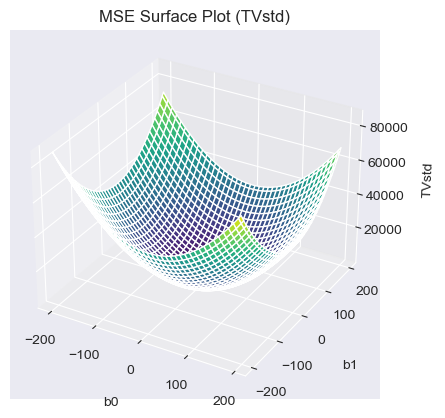

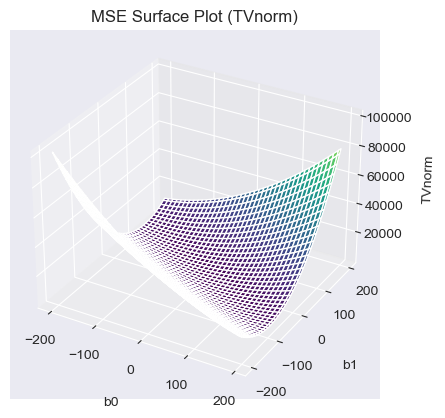

In [6]:
# Create two surface plots depicting MSE as a function of b0 and b1, one with x-values from TVstd and the other from TVnorm

# Generate b0 and b1 vector arrays and grids
b0 = np.arange(-200, 200, 5)
b1 = np.arange(-200, 200, 5)

b0_grid, b1_grid = np.meshgrid(b0, b1)

# Create the MSE TVstd plot
mse_TVstd = findZ(b0, b1, df['TVstd'], mean_squared_error)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(b0_grid, b1_grid, mse_TVstd, cmap=plt.cm.viridis)

ax.set_xlabel('b0', labelpad=10)
ax.set_ylabel('b1', labelpad=10)
ax.set_zlabel('TVstd', labelpad=10)
ax.set_title("MSE Surface Plot (TVstd)")

plt.show()

# Create the MSE TVnorm plot
mse_TVnorm = findZ(b0, b1, df['TVnorm'], mean_squared_error)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(b0_grid, b1_grid, mse_TVnorm, cmap=plt.cm.viridis)

ax.set_xlabel('b0', labelpad=10)
ax.set_ylabel('b1', labelpad=10)
ax.set_zlabel('TVnorm', labelpad=10)
ax.set_title("MSE Surface Plot (TVnorm)")

plt.show()

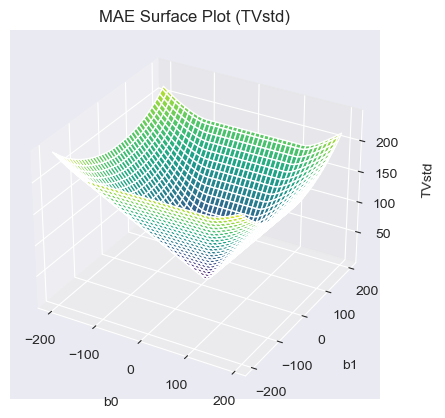

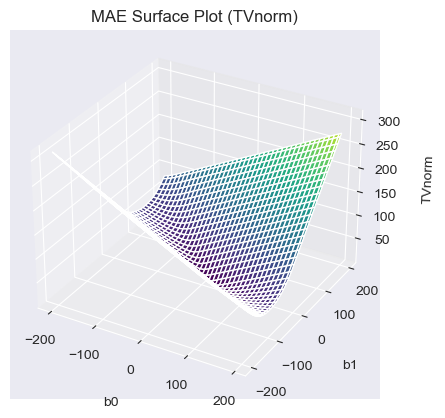

In [7]:
# Create two surface plots depicting MAE as a function of b0 and b1, one with x-values from TVstd and the other from TVnorm

# Create the MAE TVstd plot
mae_TVstd = findZ(b0, b1, df['TVstd'], mean_absolute_error)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(b0_grid, b1_grid, mae_TVstd, cmap=plt.cm.viridis)

ax.set_xlabel('b0', labelpad=10)
ax.set_ylabel('b1', labelpad=10)
ax.set_zlabel('TVstd', labelpad=10)
ax.set_title("MAE Surface Plot (TVstd)")

plt.show()

# Create the MAE TVnorm plot
mae_TVnorm = findZ(b0, b1, df['TVnorm'], mean_absolute_error)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(b0_grid, b1_grid, mae_TVnorm, cmap=plt.cm.viridis)

ax.set_xlabel('b0', labelpad=10)
ax.set_ylabel('b1', labelpad=10)
ax.set_zlabel('TVnorm', labelpad=10)
ax.set_title("MAE Surface Plot (TVnorm)")

plt.show()

In [8]:
# Implement a "random step" search algorithm to find the best-fit linear model.

stepErrorB0 = []
stepErrorB1 = []
def random_step_search(X, y, max_iter=1000):
    b0 = rnd.uniform(-200, 200)
    b1 = rnd.uniform(-200, 200)
    best_b0 = b0
    best_b1 = b1
    best_mse = mean_squared_error(y, b0 + b1 * X)

    for i in range(max_iter):
        new_b0 = b0 + rnd.uniform(-1, 1)
        new_b1 = b1 + rnd.uniform(-1, 1)
        new_mse = mean_squared_error(y, new_b0 + new_b1 * X)

        if new_mse < best_mse:
            stepErrorB0.append(b0)
            stepErrorB1.append(b1)
            best_b0 = new_b0
            best_b1 = new_b1
            best_mse = new_mse
            b0 = new_b0
            b1 = new_b1
    return best_b0, best_b1

random_step_search(df['TVstd'], df['sales'])

(14.024624401133458, 4.097766554182683)

In [9]:
# Modify your random step algorithm to instead implement gradient descent.

gradientErrorB0 = []
gradientErrorB1 = []
def gradient_descent(X, y, learning_rate=0.01, max_iter=1000):
    b0 = rnd.uniform(-200, 200)
    b1 = rnd.uniform(-200, 200)
    n = len(X)

    for i in range(max_iter):
        gradientErrorB0.append(b0)
        gradientErrorB1.append(b1)
        y_pred = b0 + b1 * X
        error = y - y_pred
        b0_gradient = -2/n * sum(error)
        b1_gradient = -2/n * sum(error * X)
        b0 = b0 - learning_rate * b0_gradient
        b1 = b1 - learning_rate * b1_gradient

    return b0, b1

gradient_descent(df['TVstd'], df['sales'])

(14.02249993098818, 4.081221629926146)

In [10]:
# Determine a linear best-fit using the scikit-learn linear regression model.

regr = lm.LinearRegression()
regr.fit(df[['TVstd']], df['sales'])
y_intercept = regr.intercept_
coef = regr.coef_
print("Slope: ", coef)
print("Y-Intercept: ", y_intercept)

Slope:  [4.08122196]
Y-Intercept:  14.0225


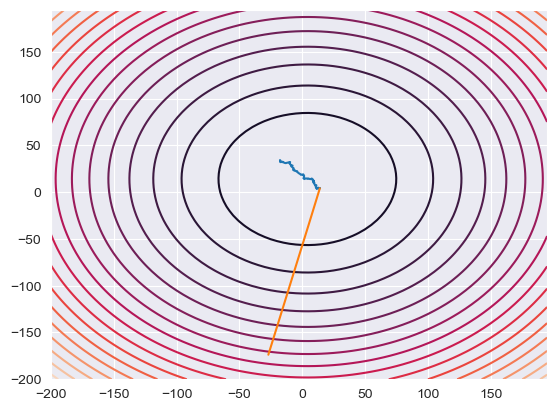

In [11]:
# Contour plot. Blue line is step MSE and Orange line is Gradient MSE.

cp = plt.contour(b0_grid, b1_grid, mse_TVstd,20)
plt.plot(stepErrorB0, stepErrorB1)
plt.plot(gradientErrorB0, gradientErrorB1)
plt.show()